<a href="https://colab.research.google.com/github/Legacy560/MLTSA25_RWolynetz/blob/main/labs/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/bitcoin_volume.csv"
dfgrouped = pd.read_csv(url, index_col = 0) #Allows index to be used as plotting index
dfgrouped.head()

,Volume
Date,
2012-01-01,10.000000
2012-01-02,10.100000
2012-01-03,107.085281
2012-01-04,107.233260
2012-01-05,70.328742


In [ ]:
dfgrouped.tail()

,Volume
Date,
2014-12-29,5317.387194
2014-12-30,7673.202917
2014-12-31,7567.614615
2015-01-01,4791.695273
2015-01-02,1651.384036


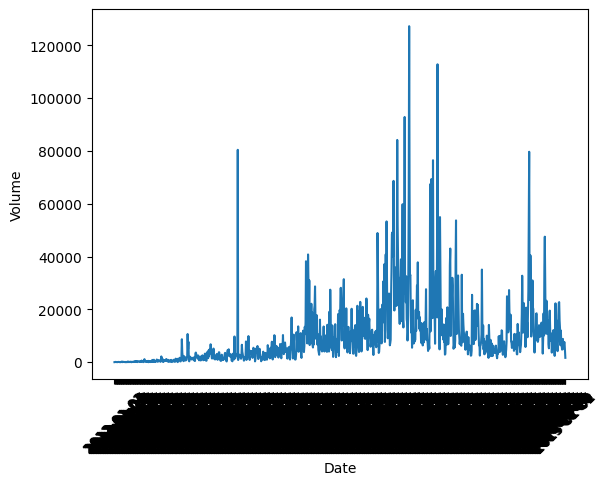

In [ ]:
plt.plot(dfgrouped.index, dfgrouped['Volume'])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation = 45);
plt.show()


In [ ]:
pd.to_datetime(dfgrouped.index)

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-27',
               '2014-12-28', '2014-12-29', '2014-12-30', '2014-12-31',
               '2015-01-01', '2015-01-02'],
              dtype='datetime64[ns]', name='Date', length=1098, freq=None)

In [ ]:
dfgrouped.index = pd.to_datetime(dfgrouped.index)


In [ ]:
dfshort = dfgrouped.iloc[200:500]

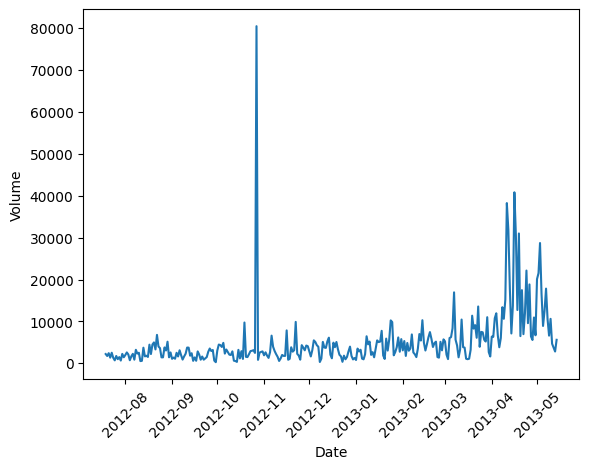

In [ ]:
plt.plot(dfshort.index, dfshort['Volume'])
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation = 45);
plt.show()

In [ ]:
rollingObject = dfshort.rolling(window = 20, center=True)

In [ ]:
m = rollingObject.mean()
s = rollingObject.std()
m.head(20) #Can't calculate mean of a 10 point window until you have 10 points

,Volume
Date,
2012-07-19,NaN
2012-07-20,NaN
2012-07-21,NaN
2012-07-22,NaN
2012-07-23,NaN
2012-07-24,NaN
2012-07-25,NaN
2012-07-26,NaN
2012-07-27,NaN


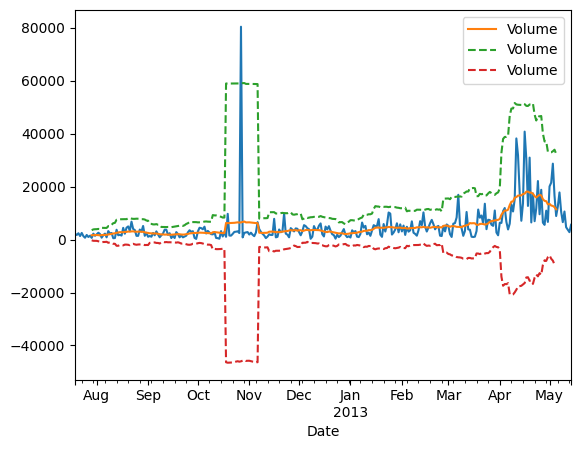

In [ ]:
ax = dfshort['Volume'].plot()
m.plot(ax=ax)
(m + 3*s).plot(ax=ax, linestyle='--')
(m - 3*s).plot(ax=ax, linestyle='--') #plots envelopes outside which we have outliers
plt.show()

In [ ]:
m

,Volume
Date,
2012-07-19,NaN
2012-07-20,NaN
2012-07-21,NaN
2012-07-22,NaN
2012-07-23,NaN
...,...
2013-05-10,NaN
2013-05-11,NaN
2013-05-12,NaN


In [ ]:
import numpy as np
np.where((dfshort["Volume"] < (m["Volume"] - 3*s["Volume"])) +
         (dfshort["Volume"] > (m["Volume"] + 3*s["Volume"])))

(array([100, 231]),)

In [ ]:
type(dfshort['Volume'])

pandas.core.series.Series

In [ ]:
m1 = dfshort['Volume'].rolling(window = 11, center = True).apply(lambda x:
                                      np.mean(np.concatenate([x[:10], x[11:]])))
s1 = dfshort['Volume'].rolling(window = 11, center = True).apply(lambda x:
                                      np.std(np.concatenate([x[:10], x[11:]])))

In [ ]:
type(m1)

pandas.core.series.Series

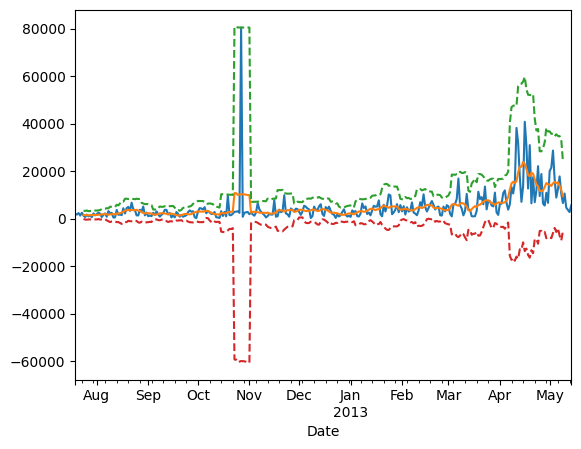

In [ ]:
ax = dfshort['Volume'].plot()
m1.plot(ax=ax)
(m1 + 3 * s1).plot(ax=ax, linestyle='--')
(m1 - 3 * s1).plot(ax=ax, linestyle='--') #plots envelopes outside which we have outliers
plt.show()